In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [80]:
def parse_data(filename):
    with open(filename) as f:
        lines = f.readlines()

    for i in range(len(lines)):
        lines[i] = re.match(r'.*= (.*)', lines[i]).group(1)
        lines[i] = lines[i].strip('][').split(', ')
        lines[i] = [int(x) for x in lines[i]]

    means = []
    medians = []
    mins = []
    
    for i in range(len(lines)):
        means.append(np.mean(lines[i]))
        medians.append(np.median(lines[i]))
        mins.append(min(lines[i]))
    
    return means, medians, mins

In [81]:
var_reads_10s = parse_data("var_reads.out")
var_reads_100s = parse_data("var_reads100.out")
var_reads_1000s = parse_data("var_reads1000.out")
var_read_sweeps = parse_data("var_sweeps.out")

[Text(0.5, 0, 'num reads'),
 Text(0, 0.5, 'objective value'),
 Text(0.5, 0, 'num reads'),
 Text(0, 0.5, 'objective value'),
 Text(0.5, 0, 'num reads'),
 Text(0, 0.5, 'objective value')]

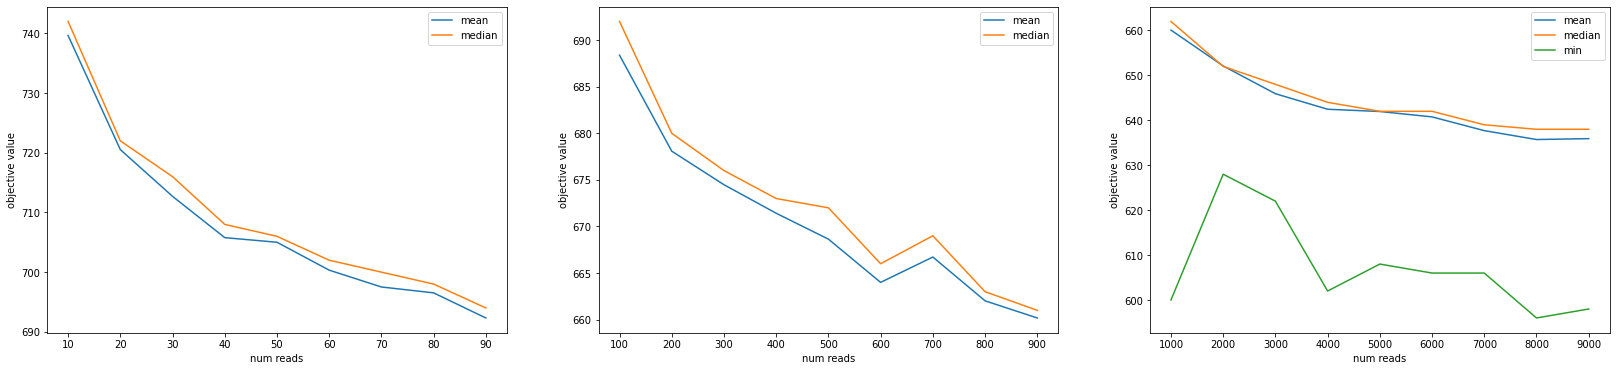

In [83]:
figure, axes = plt.subplots(1, 3, figsize=(28, 6))

sns.lineplot(x=range(10, 100, 10), y=var_reads_10s[0], ax=axes[0], label="mean")
sns.lineplot(x=range(10, 100, 10), y=var_reads_10s[1], ax=axes[0], label="median")
sns.lineplot(x=range(100, 1000, 100), y=var_reads_100s[0], ax=axes[1], label="mean")
sns.lineplot(x=range(100, 1000, 100), y=var_reads_100s[1], ax=axes[1], label="median")
sns.lineplot(x=range(1000, 10000, 1000), y=var_reads_1000s[0], ax=axes[2], label="mean")
sns.lineplot(x=range(1000, 10000, 1000), y=var_reads_1000s[1], ax=axes[2], label="median")
sns.lineplot(x=range(1000, 10000, 1000), y=var_reads_1000s[2], ax=axes[2], label="min")

plt.setp(axes[:], xlabel="num reads", ylabel="objective value")

In [85]:
min(var_reads_1000s[2])

596

In [ ]:
## x=obj, y=count
## distribution to reach ground state?
sns.histplot()

Text(0, 0.5, 'objective value')

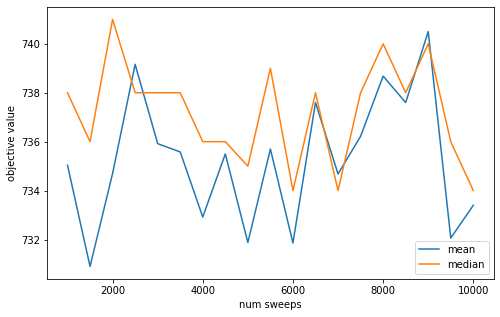

In [84]:
figure, axes = plt.subplots(1, 1, figsize=(8, 5))

sns.lineplot(x=range(1000, 10001, 500), y=var_read_sweeps[0], label="mean")
sns.lineplot(x=range(1000, 10001, 500), y=var_read_sweeps[1], label="median")

plt.xlabel("num sweeps")
plt.ylabel("objective value")